## EOSC510: Assignment 3
### Henry Crawford
#### Note: Please do apply PCA on the data (problem 2) first and then perform clustering (hierarchical clustering and SOM) on the first few modes only. Most likely the first 3 modes will be enough to keep.
#### In the final plots, make sure that you reconstruct the data (streamflow) from the clustered PC modes, as was done in the Tutorial example on SST dataset.

## Problem 1

In [1]:
# load libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

savefigs = 0

In [14]:
# load data
data = pd.read_csv('data.csv')
data = data[['x1','x2']]

print(data.head())
print(data.shape)


         x1        x2
0 -0.249396 -0.247160
1 -0.249395 -0.247160
2 -0.249390 -0.247154
3 -0.249315 -0.247073
4 -0.248754 -0.246457
(310, 2)


0     -0.249396
1     -0.249395
2     -0.249390
3     -0.249315
4     -0.248754
         ...   
305   -0.207375
306   -0.234566
307   -0.245254
308   -0.248542
309   -0.249280
Name: x1, Length: 310, dtype: float64

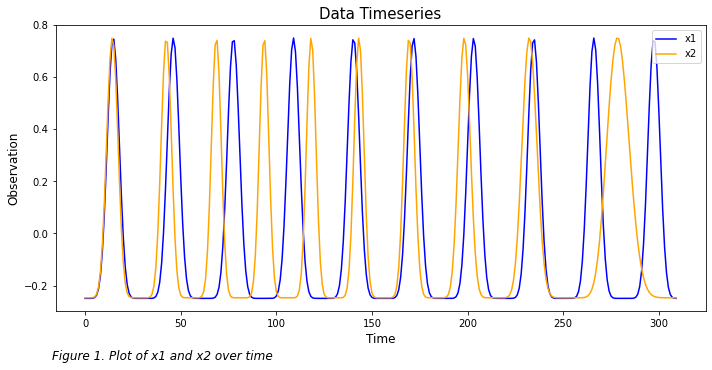

In [3]:
# plot data 

fig_cap = "Figure 1. Plot of x1 and x2 over time"

saveIt = savefigs

fig = plt.figure(figsize = (10,5))
plt.plot(data['x1'], label = 'x1', color = 'blue')
plt.plot(data['x2'], label = 'x2', color = 'orange')
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Observation', fontsize = 12)
plt.title('Data Timeseries', fontsize = 15)
plt.legend(loc = 1)

fig.text(.23, -0.01, fig_cap, ha='center', style = 'italic', fontsize = 12)

plt.tight_layout()

if saveIt:
    plt.savefig('figures/Assignment3_Q1a.png')
                
plt.show()

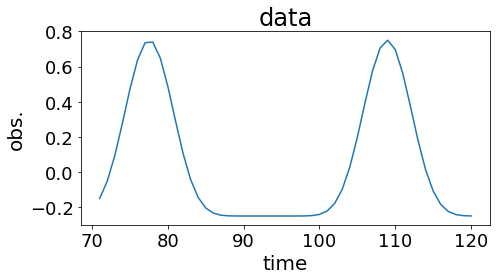

In [4]:

plt.figure(figsize = (7,4))
plt.plot(data['x1'][71:121])
plt.ylabel('obs.', fontsize = 20)
plt.xlabel('time', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('data', fontsize = 24)

plt.tight_layout()


In [5]:
# change to either x1 or x2 and re-run as needed
var_name = 'x2'
col = 'orange'
data_x = data[[var_name]]

In [6]:
#prep for SSA

#x1
L = 50
n_obs = np.shape(data_x)[0] - L + 1
SSA_input = np.empty((n_obs, L))

for kk in range(n_obs):
    SSA_input[kk,:] = data_x[var_name][kk:kk+L]

SSA_input

array([[-0.24715979, -0.24715969, -0.2471544 , ..., -0.01975693,
        -0.14401093, -0.20973608],
       [-0.24715969, -0.2471544 , -0.24707331, ..., -0.14401093,
        -0.20973608, -0.23685373],
       [-0.2471544 , -0.24707331, -0.24645719, ..., -0.20973608,
        -0.23685373, -0.24517966],
       ...,
       [-0.24714267, -0.24706688, -0.24678433, ..., -0.24715109,
        -0.24715747, -0.24715928],
       [-0.24706688, -0.24678433, -0.24594153, ..., -0.24715747,
        -0.24715928, -0.2471597 ],
       [-0.24678433, -0.24594153, -0.24382764, ..., -0.24715928,
        -0.2471597 , -0.24715978]])

In [7]:
#do SSA (PCA on the lagged matrix)
n_modes = np.min(np.shape(SSA_input))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(SSA_input)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

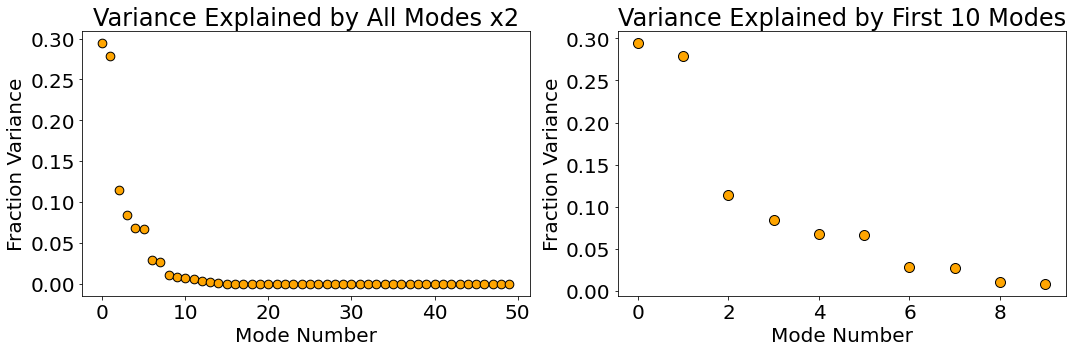

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar,s = 75, color = col, edgecolor = 'k')
plt.xlabel('Mode Number', fontsize = 20)
plt.ylabel('Fraction Variance', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Variance Explained by All Modes {}'.format(var_name), fontsize = 24)

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show],s = 100, color = col, edgecolor = 'k')
plt.xlabel('Mode Number', fontsize = 20)
plt.ylabel('Fraction Variance', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes', fontsize = 24)

plt.tight_layout()

plt.show()

In [9]:
# add up variance for first n modes
variance = round((fracVar[0] + fracVar[1] + fracVar[2] + fracVar[3] + fracVar[4] + fracVar[5]) * 100, 1)
variance

90.6

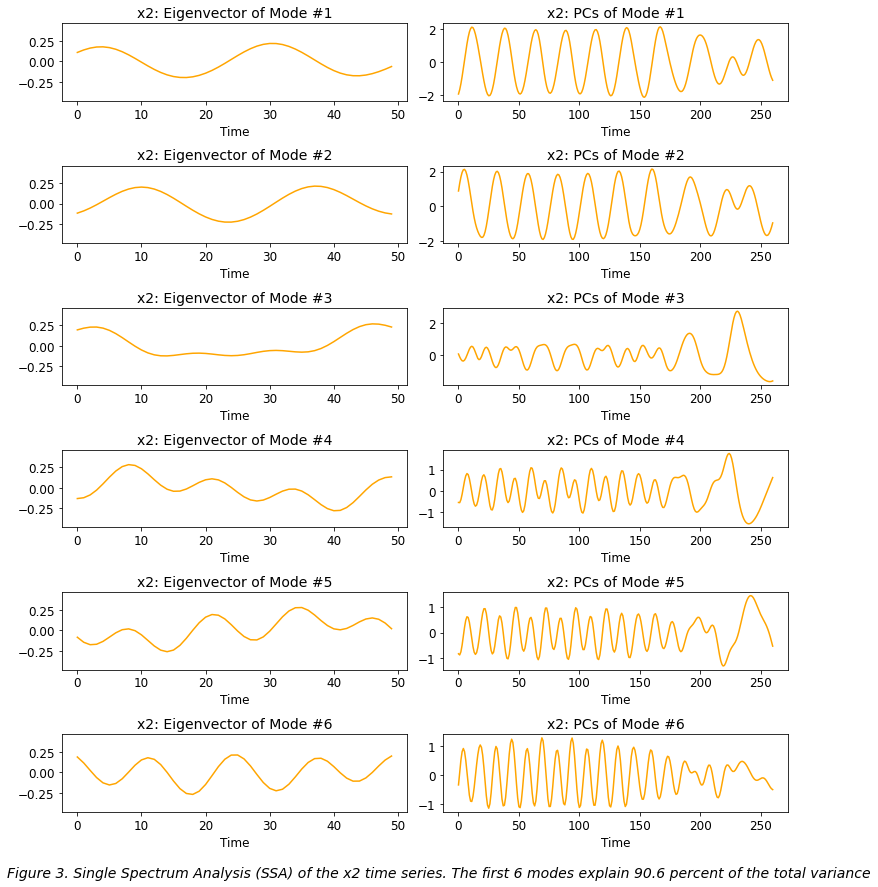

In [10]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!
saveIt = 0

n = 6
fig_cap = ("Figure 3. Single Spectrum Analysis (SSA) of the {} time series. " 
           "The first {} modes explain {} percent of the total variance".format(var_name,n, variance))

fig = plt.figure(figsize=(11,2*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk], color = col)
    plt.ylim((np.min(eigvecs),np.max(eigvecs)))
    plt.xlabel('Time', fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('{}: Eigenvector of Mode #'.format(var_name) +str(kk+1), fontsize = 14)

    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk], color = col)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('{}: PCs of Mode #'.format(var_name) + str(kk+1), fontsize = 14)
    plt.xlabel('Time', fontsize = 12)

plt.tight_layout()
fig.text(0, -0.02, fig_cap, ha='left', style = 'italic', wrap = True, fontsize = 14)
    
if saveIt:
    plt.savefig('figures/Assignmnet3_fig2_{}.png'.format(var_name))
    
plt.show()

In [11]:
freq = n/2
freq1_var = round((fracVar[0] + fracVar[1]) * 100, 1)
freq2_var = round((fracVar[2] + fracVar[3]) * 100, 1)
freq3_var = round((fracVar[4] + fracVar[5]) * 100, 1)

text = ("The {} time series has {} dominant signals, or signals of different frequencies. Together they account for {} percent of the total variance, or {}, {}, and {} percent, respectivly".format(var_name,freq, variance, freq1_var, freq2_var, freq3_var))
print(text)

The x2 time series has 3.0 dominant signals, or signals of different frequencies. Together they account for 90.6 percent of the total variance, or 57.3, 19.9, and 13.4 percent, respectivly


Text(0.5, 1.0, 'PC Space')

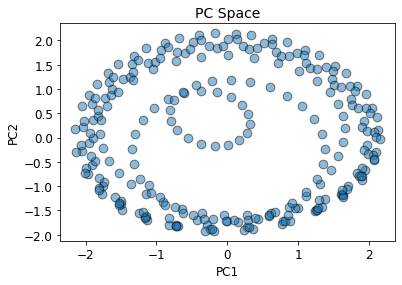

In [12]:

plt.scatter(PCs[:,0],PCs[:,1], s = 75, alpha = 0.5, edgecolor = 'k')
plt.ylabel('PC2', fontsize = 12)
plt.xlabel('PC1', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('PC Space', fontsize = 14)